In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

real = pd.read_csv('../Code/assets/real.csv')
fake = pd.read_csv('../Code/assets/fake.csv')

pd.DataFrame(real)
pd.DataFrame(fake)



,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...
...,...
19994,by hitting the referee
19995,and instead of assassinating him.. they assass...
19996,"honestly, the goalkeeper deal is not the best\..."
19997,haha goal and no bangura (:


In [8]:
real['Status'] = 0
fake['Status'] = 1

combined = pd.concat([real, fake], ignore_index=True)
print(combined)
combined.to_csv('combined.csv', index=False)

                                                   tweet  Status
0      sun downs technical director: al-ahly respecte...       0
1      shawky gharib after the tie with enppi: our go...       0
2      egyptian sports news today, wednesday 1/25/202...       0
3      the main referees committee of the egyptian fo...       0
4      haji bari, the striker of the future team, is ...       0
...                                                  ...     ...
41863                             by hitting the referee       1
41864  and instead of assassinating him.. they assass...       1
41865  honestly, the goalkeeper deal is not the best\...       1
41866                        haha goal and no bangura (:       1
41867  i swear by god almighty\nmessi will not come t...       1

[41868 rows x 2 columns]


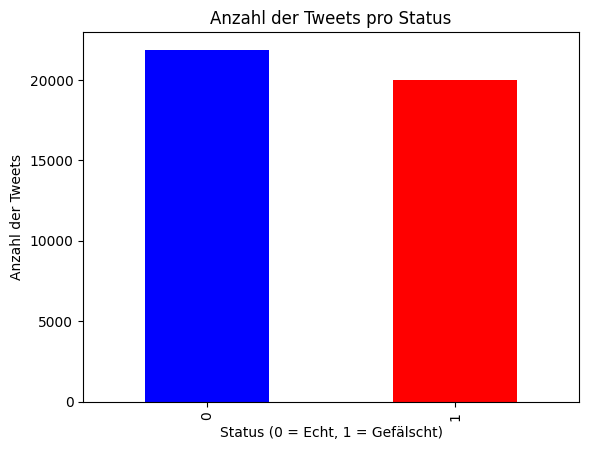

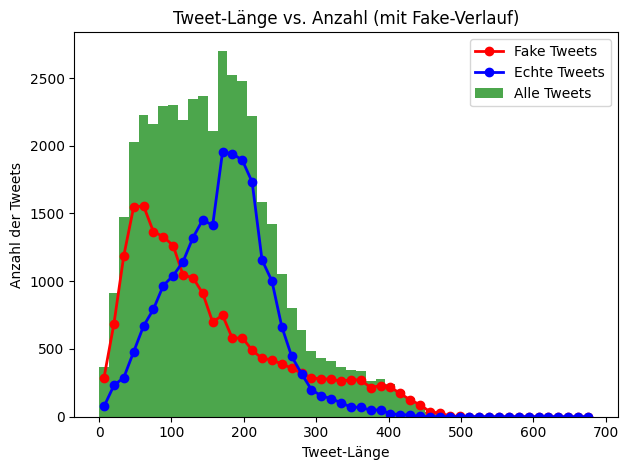

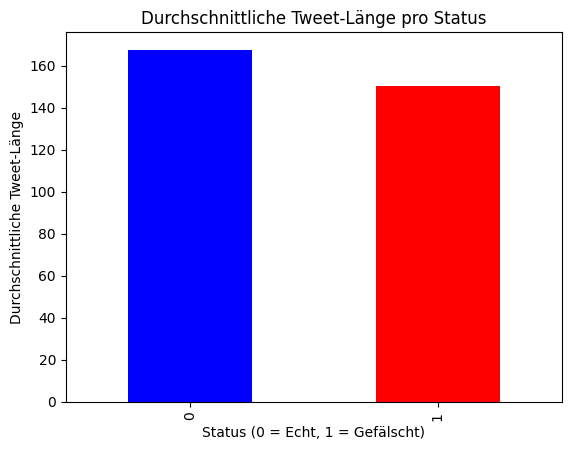

In [9]:
combined['Status'].value_counts().plot(kind='bar', color=['blue', 'red'], title='Anzahl der Tweets pro Status')
plt.xlabel('Status (0 = Echt, 1 = Gefälscht)')
plt.ylabel('Anzahl der Tweets')
plt.show()

combined['tweet_length'] = combined['tweet'].str.len()
combined['tweet_length'] = combined['tweet_length'].fillna(0) 

counts_all, bins = np.histogram(combined['tweet_length'], bins=50)

counts_fake, _ = np.histogram(combined[combined['Status'] == 1]['tweet_length'], bins=bins)
counts_real, _ = np.histogram(combined[combined['Status'] == 0]['tweet_length'], bins=bins)

bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.bar(bin_centers, counts_all, width=(bins[1] - bins[0]), color='green', alpha=0.7, label='Alle Tweets')
plt.plot(bin_centers, counts_fake, color='red', linewidth=2, marker='o', label='Fake Tweets')
plt.plot(bin_centers, counts_real, color='blue', linewidth=2, marker='o', label='Echte Tweets')

plt.title('Tweet-Länge vs. Anzahl (mit Fake-Verlauf)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Anzahl der Tweets')
plt.legend()
plt.tight_layout()
plt.show()

combined.groupby('Status')['tweet_length'].mean().plot(kind='bar', color=['blue', 'red'], title='Durchschnittliche Tweet-Länge pro Status')
plt.xlabel('Status (0 = Echt, 1 = Gefälscht)')
plt.ylabel('Durchschnittliche Tweet-Länge')

plt.show()

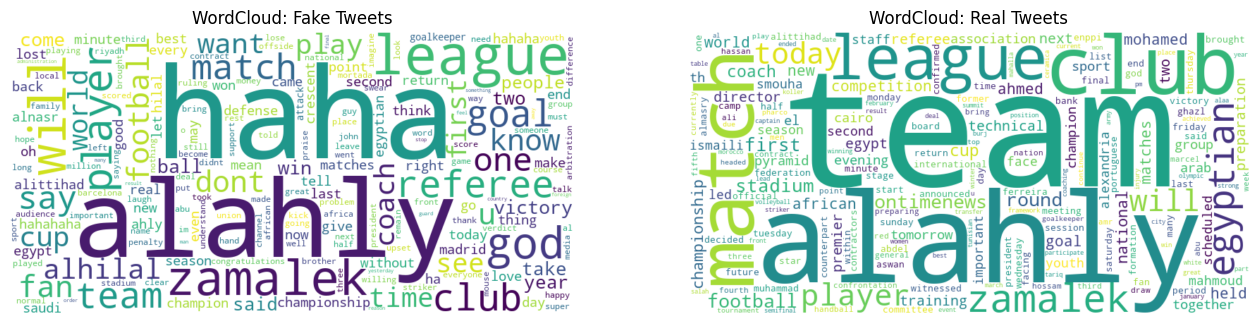

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud


def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-z\s]', '', text)  
    return text

fake_df = pd.read_csv("./assets/fake.csv")
real_df = pd.read_csv("./assets/real.csv")

fake_df.dropna(subset=["tweet"], inplace=True)
real_df.dropna(subset=["tweet"], inplace=True)

fake_text = clean_text(" ".join(fake_df["tweet"].tolist()))
real_text = clean_text(" ".join(real_df["tweet"].tolist()))

fake_wc = WordCloud(width=800, height=400,
                    background_color="white",
                    collocations=False).generate(fake_text)

real_wc = WordCloud(width=800, height=400,
                    background_color="white",
                    collocations=False).generate(real_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Fake Tweets")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Real Tweets")

plt.show()


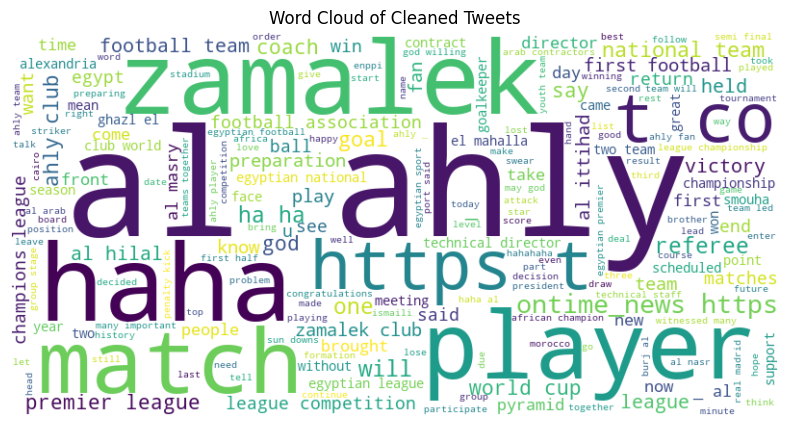

In [11]:
from wordcloud import WordCloud

all_text = ' '.join(combined['tweet'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

combined = combined.dropna(subset=['tweet', 'Status'])

combined['tweet_length'] = combined['tweet'].str.len()

X = combined[['tweet_length']]  
y = combined['Status']         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6385139170947318

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      4420
           1       0.62      0.62      0.62      3951

    accuracy                           0.64      8371
   macro avg       0.64      0.64      0.64      8371
weighted avg       0.64      0.64      0.64      8371

